# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dwiki Raynaldo. E
- **Email:** dwikiraynaldo27@gmail.com
- **ID Dicoding:** dwiki27

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola penggunaan sepeda pada hari kerja dibandingkan akhir pekan atau hari libur?

2. Apakah terdapat perbedaan signifikan dalam jumlah penyewaan sepeda antara pengguna kasual dan terdaftar?

3. Bagaimana peristiwa atau anomali cuaca ekstrem mempengaruhi jumlah penyewaan sepeda?

4. Apakah ada tren musiman yang konsisten dalam penggunaan sepeda sepanjang tahun?

5. Bagaimana pengaruh suhu udara, kecepatan angin dan kelembaban terhadap keputusan pengguna untuk menyewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling      

Data wrangling merupakan sebuah proses atau kumpulan kegiatan yang meliputi pengumpulan data (Gathering data), penilaian data (Assessing data), serta pembersihan data (Cleaning data) sebelum data digunakan dalam proses analisis data.

### Gathering Data

Tahap data wrangling, dimulai dengan proses pengumpulan data. Pada proses ini kita akan mengumpulkan semua data yang dibutuhkan untuk menjawab semua pertanyaan atau masalah bisnis yang ingin kita hadapi.

In [4]:
# Import data day.csv and hour.csv
day_df = pd.read_csv('https://github.com/dwikiraynaldo/Analisis-Data-Dicoding/blob/main/data/day.csv')
day_df.head()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 42, saw 22


In [2]:
hour_df = pd.read_csv('/content/hour.csv')
hour_df.head()

NameError: name 'pd' is not defined

In [ ]:
day_df.sample(50)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
640,641,2012-10-02,4,1,10,0,2,1,3,0.590833,0.542333,0.871667,0.104475,315,4324,4639
604,605,2012-08-27,3,1,8,0,1,1,1,0.703333,0.654688,0.730417,0.128733,989,5928,6917
416,417,2012-02-21,1,1,2,0,2,1,1,0.287826,0.295113,0.594348,0.205717,163,3614,3777
546,547,2012-06-30,3,1,6,0,6,0,1,0.765000,0.687508,0.601250,0.161071,1455,4232,5687
602,603,2012-08-25,3,1,8,0,6,0,2,0.661667,0.618696,0.712917,0.244408,1829,4224,6053
236,237,2011-08-25,3,0,8,0,4,1,2,0.684167,0.645854,0.771667,0.210833,435,3107,3542
27,28,2011-01-28,1,0,1,0,5,1,2,0.203478,0.223317,0.793043,0.123300,38,1129,1167
99,100,2011-04-10,2,0,4,0,0,0,2,0.426667,0.426737,0.857500,0.146767,1188,1707,2895
518,519,2012-06-02,2,1,6,0,6,0,1,0.583333,0.566288,0.549167,0.186562,2795,5325,8120
456,457,2012-04-01,2,1,4,0,0,0,2,0.425833,0.417287,0.676250,0.172267,2347,3694,6041


### Assessing Data

Setelah semua data yang dibutuhkan terkumpul, proses selanjutnya ialah penilaian terhadap data tersebut. Proses ini dilakukan untuk menilai kualitas dan struktur dari sebuah data. Selain itu, proses ini juga bertujuan untuk mengidentifikasi berbagai masalah yang terdapat dalam data, seperti missing value, unstandard value, dll.

**Mengecek Informasi data day_df**

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Mengecek Informasi data hour_df**

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Mengecek shape data day_df**

In [ ]:
day_df.shape

(731, 16)

**Mengecek shape data hour_df**

In [ ]:
hour_df.shape

(17379, 17)

**Melihat statistik deskriptif data day_df**

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Melihat statistik deskriptif data hour_df**

In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Mengecek missing value dan duplikasi data day_df**

In [ ]:
# Mengecek missing value pada day_df
print("missing value : \n",day_df.isnull().sum())

# Mengecek duplikasi data pada day_df
print("duplikasi data : ",day_df.duplicated().sum())

missing value : 
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
duplikasi data :  0


**Mengecek missing value dan duplikasi hour_df**

In [ ]:
# Mengecek missing value pada hour_df
print("missing value : \n",hour_df.isnull().sum())

# Mengecek duplikasi data pada hour_df
print("duplikasi data : ",hour_df.duplicated().sum())

missing value : 
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
duplikasi data :  0


### Cleaning Data

In [ ]:
# Berdasarkan hasil assessing data, tidak ditemukan missing value dan duplikasi data pada kedua dataset.
# Namun, perlu dilakukan beberapa langkah cleaning data:

# Mengubah tipe data kolom 'dteday' menjadi datetime pada kedua dataset.
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Mengganti angka menjadi keterangan pada kolom 'season' di day_df
day_df['season'] = day_df['season'].map({    1: 'Spring',    2: 'Summer',    3: 'Fall',    4: 'Winter'})

# Mengganti angka menjadi keterangan pada kolom 'season' di hour_df
hour_df['season'] = hour_df['season'].map({    1: 'Spring',    2: 'Summer',    3: 'Fall',  4: 'Winter'})
# Mengganti angka menjadi keterangan pada kolom 'weekday' di day_df
day_df['weekday'] = day_df['weekday'].map({    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

# Mengganti angka menjadi keterangan pada kolom 'weekday' di hour_df
hour_df['weekday'] = hour_df['weekday'].map({ 0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
# Mengganti angka menjadi keterangan pada kolom 'weathersit' di day_df
day_df['weathersit'] = day_df['weathersit'].map({ 1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'})

# Mengganti angka menjadi keterangan pada kolom 'weathersit' di hour_df
hour_df['weathersit'] = hour_df['weathersit'].map({ 1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'})

# Mengganti angka menjadi keterangan pada kolom 'year' di day_df
day_df['yr'] = day_df['yr'].map({ 0: '2011', 1: '2012'})

# Mengganti angka menjadi keterangan pada kolom 'year' di hour_df
hour_df['yr'] = hour_df['yr'].map({ 0: '2011', 1: '2012'})

# Mengganti angka menjadi keterangan pada kolom 'month' di day_df
day_df['mnth'] = day_df['mnth'].map({  1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',7: 'July',  8: 'August', 9: 'September', 10: 'October', 11: 'November',  12: 'December'})

# Mengganti angka menjadi keterangan pada kolom 'month' di hour_df
hour_df['mnth'] = hour_df['mnth'].map({ 1: 'January', 2: 'February',3: 'March',4: 'April',5: 'May',6: 'June',7: 'July',8: 'August',9: 'September',10: 'October',11: 'November',12: 'December'})

# Mengganti 'workingday' menjadi 'hari kerja' dan 'hari libur' di day_df
day_df['workingday'] = day_df['workingday'].map({0: 'hari libur/weekend', 1: 'hari kerja'})

# Mengganti 'workingday' menjadi 'hari kerja' dan 'hari libur' di hour_df
hour_df['workingday'] = hour_df['workingday'].map({0: 'hari libur/weekend', 1: 'hari kerja'})

# Mengganti 'holiday' menjadi 'libur' dan 'tidak libur' di day_df
day_df['holiday'] = day_df['holiday'].map({0: 'tidak libur', 1: 'libur'})

# Mengganti 'holiday' menjadi 'libur' dan 'tidak libur' di hour_df
hour_df['holiday'] = hour_df['holiday'].map({0: 'tidak libur', 1: 'libur'})

## Exploratory Data Analysis (EDA)

In [ ]:
day_df.describe(include='all')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,January,tidak libur,Saturday,hari kerja,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,May,NaN,tidak libur,Saturday,hari kerja,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
# Group by month and sort by month order
monthly_data = day_df.groupby('mnth').agg({'cnt': ['min', 'max','mean','sum']})

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December']

# Sort the data by month order
monthly_data = monthly_data.reindex(month_order)

monthly_data

cnt                           
            min   max         mean     sum
mnth                                      
January     431  4521  2176.338710  134933
February   1005  5062  2655.298246  151352
March       605  8362  3692.258065  228920
April       795  7460  4484.900000  269094
May        2633  8294  5349.774194  331686
June       3767  8120  5772.366667  346342
July       3285  8173  5563.677419  344948
August     1115  7865  5664.419355  351194
September  1842  8714  5766.516667  345991
October      22  8156  5199.225806  322352
November   1495  6852  4247.183333  254831
December    441  6606  3403.806452  211036

Berdasarkan output diatas dapat disimpulkan bahwa pada tahun 2011 hingga 2012, rata rata peminjaman sepeda **tertinggi** ada pada bulan **Januari** dan **terendah** pada bulan **September**.

In [ ]:
day_df.groupby(by="season").agg({
    "cnt": ["max", "min", "mean", "sum"]
})

cnt                            
         max   min         mean      sum
season                                  
Fall    8714  1115  5644.303191  1061129
Spring  7836   431  2604.132597   471348
Summer  8362   795  4992.331522   918589
Winter  8555    22  4728.162921   841613

Berdasarkan data diatas dapat disimpulkan baha pada tahun 2011 hingga 2012, rata rata peminjamban sepeda **tertinggi** ada pada **musim Gugur** dan **terendah** pada **musim Semi**

In [ ]:
hour_df.groupby(by="weathersit").agg({
    "cnt": ["max", "min", "mean", "sum"]
})

cnt                         
                 max min        mean      sum
weathersit                                   
Clear            977   1  204.869272  2338173
Heavy Rain/Snow  164  23   74.333333      223
Light Snow/Rain  891   1  111.579281   158331
Mist             957   1  175.165493   795952

Berdasarkan data diatas dapat disimpulkan baha pada tahun 2011 hingga 2012, rata rata peminjaman sepeda **tertinggi** ada pada cuaca **cerah** dan **terendah** pada cuaca **hujan lebat**

In [ ]:
hour_df.groupby(by="hr").agg({
    "cnt": ["max", "min", "mean", "sum"]
})

cnt                        
    max min        mean     sum
hr                             
0   283   2   53.898072   39130
1   168   1   33.375691   24164
2   132   1   22.869930   16352
3    79   1   11.727403    8174
4    28   1    6.352941    4428
5    66   1   19.889819   14261
6   213   1   76.044138   55132
7   596   1  212.064649  154171
8   839   5  359.011004  261001
9   426  14  219.309491  159438
10  539   8  173.668501  126257
11  663  10  208.143054  151320
12  776   3  253.315934  184414
13  760  11  253.661180  184919
14  750  12  240.949246  175652
15  750   7  251.233196  183149
16  783  11  311.983562  227748
17  976  15  461.452055  336860
18  977  23  425.510989  309772
19  743  11  311.523352  226789
20  567  11  226.030220  164550
21  584   6  172.314560  125445
22  502   9  131.335165   95612
23  256   2   87.831044   63941

Berdasarkan data diatas dapat disimpulkan baha pada tahun 2011 hingga 2012, rata rata peminjaman sepeda tertinggi ada pada jam 17.00 - 18.00 dan terendah pada jam 04.00 - 05.00

## Visualization & Explanatory Analysis

### Pertanyaan 1:

**Bagaimana pola penggunaan sepeda pada hari kerja dibandingkan akhir pekan atau hari libur?**

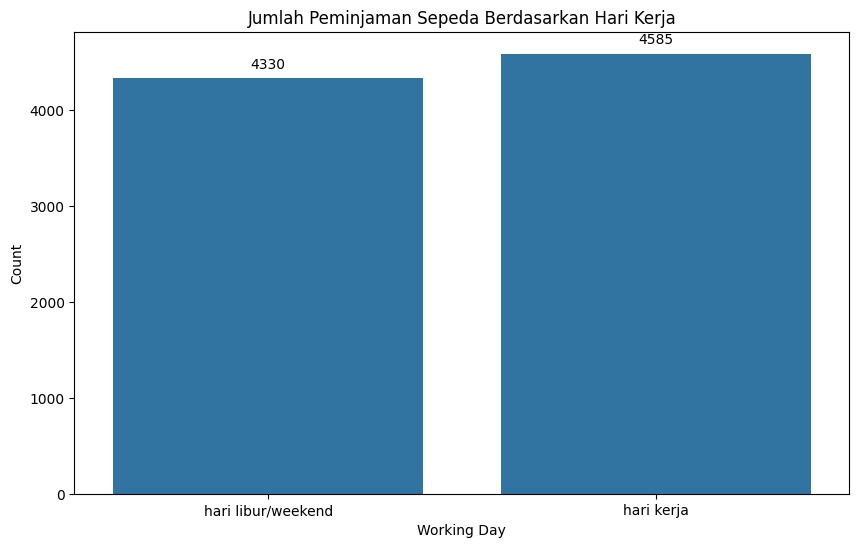

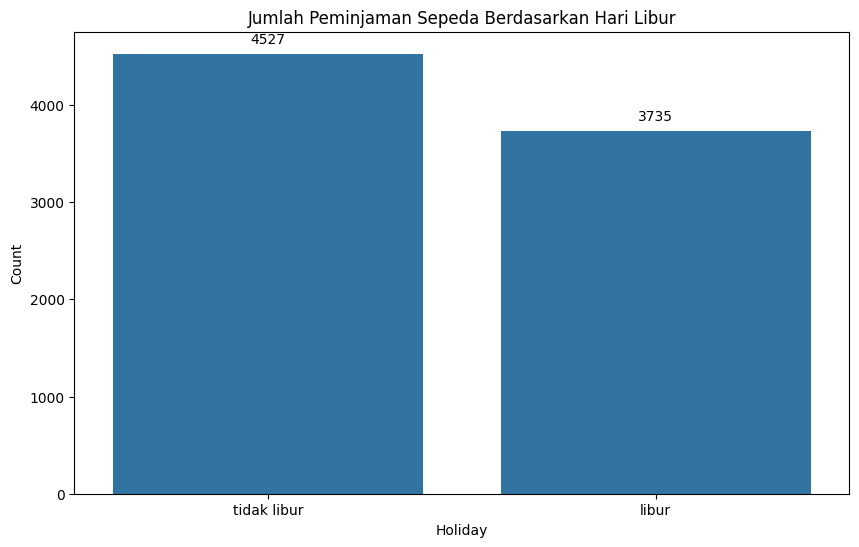

In [ ]:
# prompt: buat diagram batang working day dan cnt dan tampilin nilai, hilagin garis diatas

plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='cnt', data=day_df,errorbar=None)  # ci=None removes the error bars
plt.xlabel('Working Day')
plt.ylabel('Count')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Hari Kerja')

# Menambahkan nilai pada setiap bar
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

plt.show()
# prompt: buat diagram batang working day dan cnt dan tampilin nilai, hilagin garis diatas

plt.figure(figsize=(10, 6))
sns.barplot(x='holiday', y='cnt', data=day_df,errorbar=None )  # ci=None removes the error bars
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Hari Libur')

# Menambahkan nilai pada setiap bar
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

plt.show()

Berdasarkan visualisasi data menggunakan barplot di atas, dapat disimpulkan sebagai berikut:

Jumlah pengguna sepeda pada hari kerja (Senin-Jumat) lebih banyak dari hari weekend (Sabtu dan Minggu)

Jumlah pengguna sepeda pada hari libur nasional lebih sedikit dari hari biasa.


### Pertanyaan 2:

**Apakah terdapat perbedaan signifikan dalam jumlah penyewaan sepeda antara pengguna kasual dan terdaftar?**

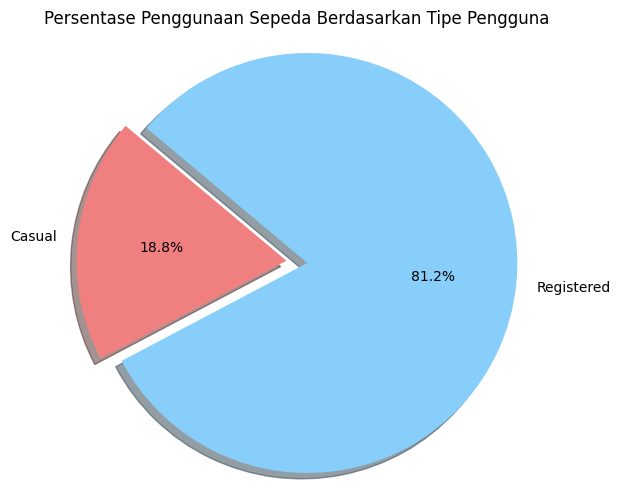

In [ ]:
# prompt: bandingkan penggunaan casual dan register secara persentase buat diagram  lingkaran

# Hitung persentase pengguna casual dan registered
total_users = hour_df['casual'].sum() + hour_df['registered'].sum()
casual_percentage = (hour_df['casual'].sum() / total_users) * 100
registered_percentage = (hour_df['registered'].sum() / total_users) * 100

# Buat diagram lingkaran
labels = ['Casual', 'Registered']
sizes = [casual_percentage, registered_percentage]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # Pisahkan sedikit bagian 'Casual'

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Persentase Penggunaan Sepeda Berdasarkan Tipe Pengguna')
plt.axis('equal')  # Pastikan lingkaran terlihat bulat
plt.show()

Diagram ini menunjukkan bahwa pengguna terdaftar jauh lebih banyak (81,2%) dibandingkan dengan pengguna kasual (18,8%). Ini mengindikasikan bahwa program penyewaan sepeda telah berhasil menarik minat pengguna untuk berlangganan secara reguler.


### Pertanyaan 3:

**3. Bagaimana peristiwa atau anomali cuaca ekstrem mempengaruhi jumlah penyewaan sepeda?**

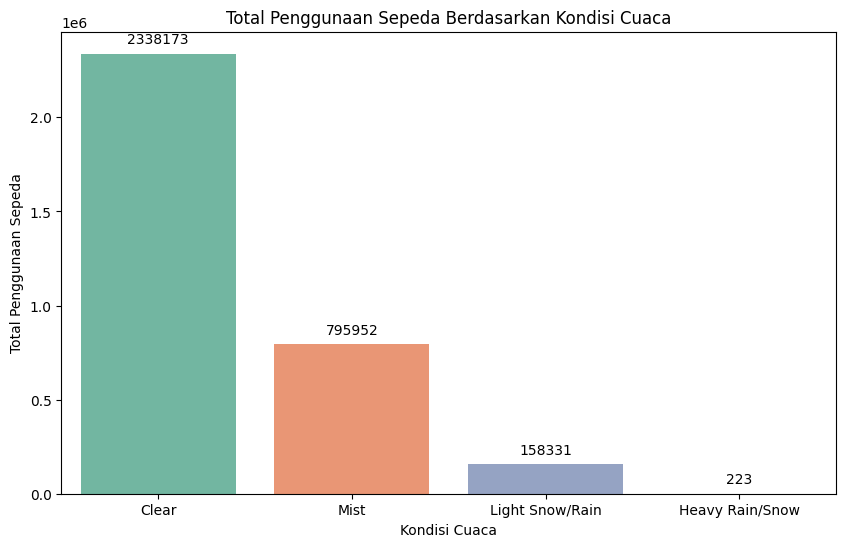

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt',hue='weathersit', data=hour_df, estimator=sum, errorbar=None, palette='Set2')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Penggunaan Sepeda')
plt.title('Total Penggunaan Sepeda Berdasarkan Kondisi Cuaca')

# Menambahkan nilai pada setiap bar
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

plt.show()

Diagram ini menunjukkan bahwa jumlah total penggunaan sepeda paling tinggi pada cuaca cerah, dan paling rendah pada cuaca hujan lebat/salju. Ini menunjukkan bahwa cuaca memiliki pengaruh yang signifikan terhadap minat masyarakat untuk menggunakan sepeda. Ketika cuaca buruk, seperti hujan lebat atau salju, masyarakat cenderung lebih memilih menggunakan transportasi lain yang lebih terlindungi dari cuaca ekstrem.

### Pertanyaan 4:

**Apakah ada tren musiman yang konsisten dalam penggunaan sepeda sepanjang tahun?**

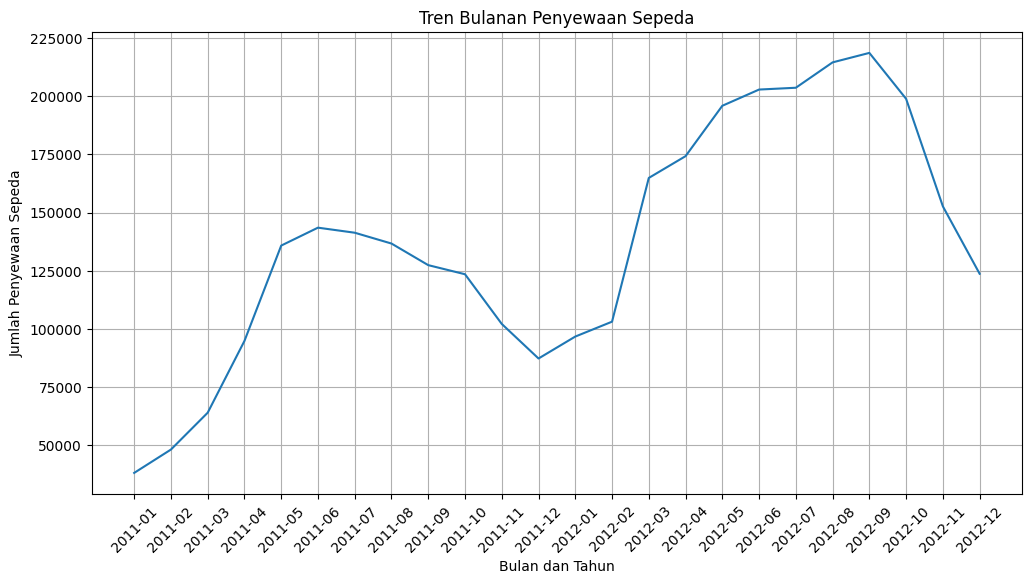

In [ ]:
# Membuat variabel baru berisi bulan dan tahun lalu
day_df['year_month'] = day_df['dteday'].dt.strftime('%Y-%m')

# Mengelompokkan data berdasarkan bulan dan tahun, kemudian menghitung jumlah penyewaan sepeda
monthly_trend = day_df.groupby('year_month')['cnt'].sum()

# Membuat plot tren bulanan
plt.figure(figsize=(12, 6))
plt.plot(monthly_trend.index, monthly_trend.values)
plt.xlabel('Bulan dan Tahun')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Tren Bulanan Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Secara umum, terdapat tren peningkatan jumlah penyewaan sepeda dari tahun 2011 hingga 2012. Ini menunjukkan bahwa popularitas penggunaan sepeda terus meningkat selama periode tersebut.

Selain tren keseluruhan, terdapat beberapa fluktuasi yang signifikan dalam jumlah penyewaan sepeda sepanjang tahun.  Pada beberapa bulan,pada bulan Mei - Oktober, jumlah penyewaan cenderung lebih tinggi dibandingkan dengan bulan-bulan lainnya.

Sebaliknya, pada November-Februari, jumlah penyewaan cenderung lebih rendah.

### Pertanyaan 5:


5. Bagaimana pengaruh suhu udara, kecepatan angin dan kelembaban terhadap keputusan pengguna untuk menyewa sepeda?

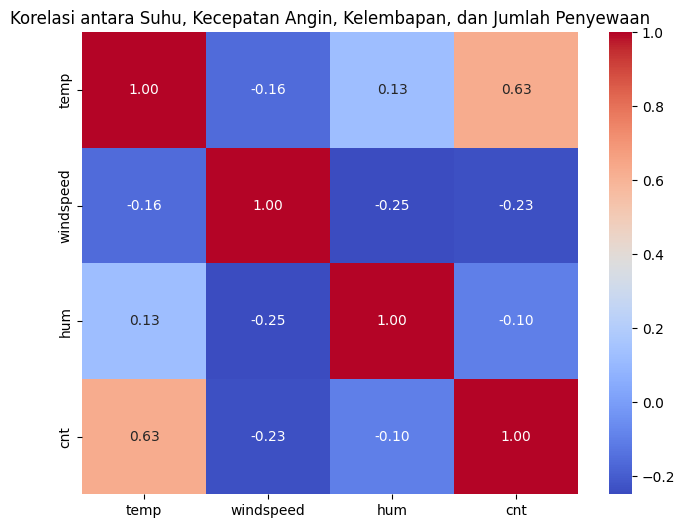

In [ ]:
# Hitung korelasi antara variabel-variabel yang terkait
correlation_matrix = day_df[['temp', 'windspeed', 'hum', 'cnt']].corr()

# Buat heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antara Suhu, Kecepatan Angin, Kelembapan, dan Jumlah Penyewaan')
plt.show()

Suhu (temp) memiliki korelasi positif yang cukup kuat dengan jumlah penyewaan (cnt). Artinya, ketika suhu udara meningkat, jumlah penyewaan sepeda juga cenderung meningkat.

Kecepatan angin (windspeed) memiliki korelasi negatif yang lemah dengan jumlah penyewaan (cnt). Artinya, ketika kecepatan angin meningkat, jumlah penyewaan sepeda cenderung sedikit menurun. Namun, korelasi ini relatif lemah, sehingga pengaruh kecepatan angin terhadap keputusan sewa sepeda tidak terlalu signifikan.

Kelembapan (hum) memiliki korelasi negatif yang lemah dengan jumlah penyewaan (cnt). Artinya, ketika kelembapan udara meningkat, jumlah penyewaan sepeda cenderung sedikit menurun. Sama seperti kecepatan angin, korelasi ini juga relatif lemah, sehingga pengaruh kelembapan terhadap keputusan sewa sepeda tidak terlalu signifikan.

## Analisis Lanjutan

###Analisis Clustering

In [ ]:
# mengelompokkan data berdasarkan 'weather' dan menghitung nilai unik serta statistik untuk kolom 'count'
weather_analysis = hour_df.groupby('weathersit').agg({
    'cnt': ['nunique', 'min', 'max', 'mean', 'median', 'std']
})

weather_analysis

cnt                                        
                nunique min  max        mean median         std
weathersit                                                     
Clear               848   1  977  204.869272  159.0  189.487773
Heavy Rain/Snow       3  23  164   74.333333   36.0   77.925178
Light Snow/Rain     368   1  891  111.579281   63.0  133.781045
Mist                649   1  957  175.165493  133.0  165.431589

Dari tabel di atas, kita dapat melihat statistik 'cnt' (jumlah penyewaan sepeda) untuk setiap kondisi cuaca.
Misalnya, pada kondisi cuaca 'Clear', jumlah penyewaan memiliki rata-rata tertinggi, menunjukkan bahwa cuaca cerah berkorelasi dengan peningkatan minat penyewaan sepeda. Sebaliknya, pada kondisi cuaca 'Heavy Rain/Snow', jumlah penyewaan memiliki rata-rata terendah, menunjukkan bahwa cuaca buruk mengurangi minat penyewaan.

## Conclusion

Berdasarkan analisis yang telah dilakukan pada dataset Bike Sharing, dapat disimpulkan bahwa beberapa faktor berpengaruh terhadap pola penggunaan sepeda.

**Pola Penggunaan Sepeda:**

* **Hari Kerja vs Akhir Pekan:** Penggunaan sepeda lebih tinggi pada hari kerja dibandingkan dengan akhir pekan dan hari libur. Hal ini menunjukkan bahwa sebagian besar pengguna sepeda adalah pekerja atau pelajar yang menggunakan sepeda untuk keperluan komuter.
* **Pengguna Terdaftar vs Kasual:** Sebagian besar pengguna sepeda adalah pengguna terdaftar, yang menunjukkan bahwa program berlangganan sepeda telah sukses menarik minat pengguna.
* **Musim:** Terdapat tren musiman yang jelas, di mana jumlah penyewaan sepeda lebih tinggi pada musim panas dan gugur, serta lebih rendah pada musim dingin dan semi. Hal ini kemungkinan dipengaruhi oleh kondisi cuaca dan suhu yang lebih nyaman pada musim panas dan gugur.
* **Kondisi Cuaca:** Cuaca memiliki pengaruh yang signifikan terhadap penggunaan sepeda. Jumlah penyewaan cenderung lebih tinggi pada cuaca cerah dan lebih rendah pada cuaca buruk seperti hujan lebat atau salju.

**Faktor Pengaruh:**

* **Suhu:** Suhu udara memiliki korelasi positif yang kuat terhadap jumlah penyewaan sepeda. Ketika suhu naik, minat untuk menggunakan sepeda juga meningkat.
* **Kecepatan Angin dan Kelembapan:** Kecepatan angin dan kelembapan memiliki korelasi negatif lemah terhadap jumlah penyewaan. Namun, pengaruhnya tidak terlalu signifikan.

**Analisis Lanjutan:**

* **Clustering berdasarkan Cuaca:** Analisis clustering menunjukkan bahwa cuaca cerah memiliki rata-rata jumlah penyewaan tertinggi, sedangkan cuaca buruk memiliki rata-rata terendah.


In [ ]:
day_df.sample(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year_month
601,602,2012-08-24,Fall,2012,August,tidak libur,Friday,hari kerja,Mist,0.702500,0.647100,0.615000,0.072146,1325,6257,7582,2012-08
474,475,2012-04-19,Summer,2012,April,tidak libur,Thursday,hari kerja,Clear,0.498333,0.493046,0.612500,0.065929,846,5719,6565,2012-04
462,463,2012-04-07,Summer,2012,April,tidak libur,Saturday,hari libur/weekend,Clear,0.437500,0.426129,0.254167,0.274871,3252,3605,6857,2012-04
587,588,2012-08-10,Fall,2012,August,tidak libur,Friday,hari kerja,Mist,0.715833,0.667942,0.715833,0.238813,1065,4721,5786,2012-08
272,273,2011-09-30,Winter,2011,September,tidak libur,Friday,hari kerja,Clear,0.564167,0.544829,0.647500,0.206475,830,4372,5202,2011-09
719,720,2012-12-20,Winter,2012,December,tidak libur,Thursday,hari kerja,Mist,0.330000,0.335217,0.667917,0.132463,314,3814,4128,2012-12
373,374,2012-01-09,Spring,2012,January,tidak libur,Monday,hari kerja,Mist,0.224167,0.247479,0.701667,0.098900,106,2270,2376,2012-01
166,167,2011-06-16,Summer,2011,June,tidak libur,Thursday,hari kerja,Mist,0.628333,0.595346,0.688333,0.206471,545,3222,3767,2011-06
254,255,2011-09-12,Fall,2011,September,tidak libur,Monday,hari kerja,Clear,0.644348,0.602130,0.692174,0.088913,690,4023,4713,2011-09
427,428,2012-03-03,Spring,2012,March,tidak libur,Saturday,hari libur/weekend,Mist,0.414167,0.413492,0.621250,0.161079,956,3110,4066,2012-03


In [ ]:
# prompt: buat dashboard beserta analisis pertanyaan 1 sampai 5 dan analisis lajutan dengan streamlit, ada pilihan side barnya

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data (replace with your actual data loading)
day_df = pd.read_csv('/content/day.csv')
hour_df = pd.read_csv('/content/hour.csv')

# Sidebar with options
st.sidebar.title("Bike Sharing Dashboard")
selected_analysis = st.sidebar.selectbox("Pilih Analisis", ["Pertanyaan 1", "Pertanyaan 2", "Pertanyaan 3", "Pertanyaan 4", "Pertanyaan 5", "Analisis Lanjutan"])

# Main content area
st.title("Bike Sharing Dashboard")

if selected_analysis == "Pertanyaan 1":
    st.header("Pola Penggunaan Sepeda pada Hari Kerja vs Akhir Pekan")

    # Visualisasi dengan Barplot (copy from your existing code)
    st.subheader("Jumlah Peminjaman Sepeda Berdasarkan Hari Kerja")
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x='workingday', y='cnt', data=day_df, errorbar=None, ax=ax)
    plt.xlabel('Working Day')
    plt.ylabel('Count')
    plt.title('Jumlah Peminjaman Sepeda Berdasarkan Hari Kerja')
    st.pyplot(fig)

    st.subheader("Jumlah Peminjaman Sepeda Berdasarkan Hari Libur")
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x='holiday', y='cnt', data=day_df, errorbar=None, ax=ax)
    plt.xlabel('Holiday')
    plt.ylabel('Count')
    plt.title('Jumlah Peminjaman Sepeda Berdasarkan Hari Libur')
    st.pyplot(fig)

    st.write("**Kesimpulan:**")
    st.write("- Jumlah pengguna sepeda pada hari kerja lebih banyak daripada hari weekend.")
    st.write("- Jumlah pengguna sepeda pada hari libur nasional lebih sedikit daripada hari biasa.")


elif selected_analysis == "Pertanyaan 2":
    st.header("Perbedaan Signifikan dalam Jumlah Penyewaan Sepeda (Casual vs Registered)")

    # Visualisasi dengan Pie Chart (copy from your existing code)
    total_users = hour_df['casual'].sum() + hour_df['registered'].sum()
    casual_percentage = (hour_df['casual'].sum() / total_users) * 100
    registered_percentage = (hour_df['registered'].sum() / total_users) * 100

    labels = ['Casual', 'Registered']
    sizes = [casual_percentage, registered_percentage]
    colors = ['lightcoral', 'lightskyblue']
    explode = (0.1, 0)

    fig, ax = plt.subplots(figsize=(6, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title('Persentase Penggunaan Sepeda Berdasarkan Tipe Pengguna')
    plt.axis('equal')
    st.pyplot(fig)

    st.write("**Kesimpulan:**")
    st.write("- Pengguna terdaftar jauh lebih banyak daripada pengguna kasual.")
    st.write("- Ini menunjukkan bahwa program penyewaan sepeda telah berhasil menarik minat pengguna untuk berlangganan secara reguler.")


elif selected_analysis == "Pertanyaan 3":
    st.header("Pengaruh Cuaca Ekstrem terhadap Jumlah Penyewaan Sepeda")

    # Visualisasi dengan Barplot (copy from your existing code)
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x='weathersit', y='cnt', hue='weathersit', data=hour_df, estimator=sum, errorbar=None, palette='Set2', ax=ax)
    plt.xlabel('Kondisi Cuaca')
    plt.ylabel('Total Penggunaan Sepeda')
    plt.title('Total Penggunaan Sepeda Berdasarkan Kondisi Cuaca')
    st.pyplot(fig)

    st.write("**Kesimpulan:**")
    st.write("- Jumlah total penggunaan sepeda paling tinggi pada cuaca cerah.")
    st.write("- Jumlah total penggunaan sepeda paling rendah pada cuaca hujan lebat/salju.")
    st.write("- Ini menunjukkan bahwa cuaca memiliki pengaruh yang signifikan terhadap minat masyarakat untuk menggunakan sepeda.")


elif selected_analysis == "Pertanyaan 4":
    st.header("Tren Musiman Penggunaan Sepeda Sepanjang Tahun")

    # Visualisasi dengan Lineplot (copy from your existing code)
    day_df['year_month'] = day_df['dteday'].dt.strftime('%Y-%m')
    monthly_trend = day_df.groupby('year_month')['cnt'].sum()

    fig, ax = plt.subplots(figsize=(12, 6))
    plt.plot(monthly_trend.index, monthly_trend.values)
    plt.xlabel('Bulan dan Tahun')
    plt.ylabel('Jumlah Penyewaan Sepeda')
    plt.title('Tren Bulanan Penyewaan Sepeda')
    plt.xticks(rotation=45)
    plt.grid(True)
    st.pyplot(fig)

    st.write("**Kesimpulan:**")
    st.write("- Terdapat tren peningkatan jumlah penyewaan sepeda dari tahun 2011 hingga 2012.")
    st.write("- Pada beberapa bulan, jumlah penyewaan cenderung lebih tinggi (Mei-Oktober).")
    st.write("- Pada bulan-bulan lain (November-Februari), jumlah penyewaan cenderung lebih rendah.")


elif selected_analysis == "Pertanyaan 5":
    st.header("Pengaruh Suhu, Kecepatan Angin, dan Kelembapan terhadap Keputusan Sewa Sepeda")

    # Visualisasi dengan Heatmap (copy from your existing code)
    correlation_matrix = day_df[['temp', 'windspeed', 'hum', 'cnt']].corr()

    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
    plt.title('Korelasi antara Suhu, Kecepatan Angin, Kelembapan, dan Jumlah Penyewaan')
    st.pyplot(fig)

    st.write("**Kesimpulan:**")
    st.write("- Suhu memiliki korelasi positif yang kuat dengan jumlah penyewaan.")
    st.write("- Kecepatan angin dan kelembapan memiliki korelasi negatif lemah dengan jumlah penyewaan.")


elif selected_analysis == "Analisis Lanjutan":
    st.header("Analisis Lanjutan")

    # Analisis Clustering (copy from your existing code)
    weather_analysis = hour_df.groupby('weathersit').agg({
        'cnt': ['nunique', 'min', 'max', 'mean', 'median', 'std']
    })
    st.write(weather_analysis)

    st.write("**Kesimpulan:**")
    st.write("- Cuaca cerah memiliki rata-rata jumlah penyewaan tertinggi.")
    st.write("- Cuaca buruk memiliki rata-rata jumlah penyewaan terendah.")


# You can add more analyses and visualizations based on your needs.

ModuleNotFoundError: No module named 'streamlit'